In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import torch
from torch import nn
from torch.nn import functional as f
from torch.utils.data import TensorDataset, DataLoader


import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt

import os
from torchvision.datasets import MNIST
from torchvision import transforms as tfs
from torch.utils.data import Dataset

from torch.optim import lr_scheduler
from IPython.display import clear_output

from matplotlib import pyplot as plt
%matplotlib inline
# КРАСИВЫЕ ГРАФИКИ - КАК СИМВОЛ ПОБЕДЫ, ВЕКТОРНАЯ ПРОРИСОВКА - КАК ОРУДИЕ ВОЙНЫ
%config InlineBackend.figure_format = 'svg' 

device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2

In [ ]:
normal_data = pd.read_csv('Normal_data.csv')
anomaly_data = pd.read_csv('Anomaly_data.csv')

normal_data = normal_data.drop('Unnamed: 0', axis=1)
anomaly_data = anomaly_data.drop('Unnamed: 0', axis=1)

normal_data.dtypes

FIT101     float64
LIT101     float64
AIT201     float64
AIT202     float64
AIT203     float64
FIT201     float64
DPIT301    float64
FIT301     float64
LIT301     float64
AIT401     float64
AIT402     float64
FIT401     float64
LIT401     float64
AIT501     float64
AIT502     float64
AIT503     float64
AIT504     float64
FIT501     float64
FIT502     float64
FIT503     float64
FIT504     float64
PIT501     float64
PIT502     float64
PIT503     float64
FIT601     float64
MV101        int64
P101         int64
P102         int64
MV201        int64
P201         int64
P202         int64
P203         int64
P204         int64
P205         int64
P206         int64
MV301        int64
MV302        int64
MV303        int64
MV304        int64
P301         int64
P302         int64
P401         int64
P402         int64
P403         int64
P404         int64
UV401        int64
P501         int64
P502         int64
P601         int64
P602         int64
P603         int64
dtype: object

In [ ]:
normal_data

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,P401,P402,P403,P404,UV401,P501,P502,P601,P602,P603
0,0.000000,124.372375,251.9226,8.313446,312.79160,0.000000,2.560983,0.000256,138.666350,0.000,...,1,1,1,1,1,1,1,1,1,1
1,0.000000,124.333125,251.9226,8.313286,312.79160,0.000000,2.560983,0.000256,138.586300,0.000,...,1,1,1,1,1,1,1,1,1,1
2,0.000000,124.254575,251.9226,8.309200,312.79160,0.000000,2.560983,0.000256,138.135675,0.000,...,1,1,1,1,1,1,1,1,1,1
3,0.000000,124.097600,251.9226,8.311844,312.79160,0.000000,2.560983,0.000256,137.905300,0.000,...,1,1,1,1,1,1,1,1,1,1
4,0.000000,124.156500,251.9226,8.309921,312.91980,0.000000,2.560983,0.000256,137.905300,0.000,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,2.449797,516.782200,261.2791,8.388426,329.80005,2.442828,19.773990,2.202863,869.789000,148.808,...,1,2,1,1,2,2,1,1,1,1
49496,2.449797,516.782200,261.2791,8.388426,329.80005,2.442828,19.773990,2.202991,869.789000,148.808,...,1,2,1,1,2,2,1,1,1,1
49497,2.449717,516.782200,261.2791,8.388426,329.80005,2.442828,19.780400,2.202991,869.789000,148.808,...,1,2,1,1,2,2,1,1,1,1
49498,2.450117,516.782200,261.2791,8.388426,329.80005,2.442828,19.780400,2.202991,869.789000,148.808,...,1,2,1,1,2,2,1,1,1,1


In [ ]:
anomaly_data

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,P402,P403,P404,UV401,P501,P502,P601,P602,P603,Normal/Attack
0,2.500481,522.905625,262.0161,8.394514,328.6337,2.443726,19.69076,2.208532,956.565625,148.8080,...,2,1,1,2,2,1,1,1,1,0
1,2.606812,523.464975,262.0161,8.394514,328.6337,2.441803,19.69076,2.209525,957.226525,148.8080,...,2,1,1,2,2,1,1,1,1,0
2,2.551164,522.984125,262.0161,8.390669,328.6337,2.441803,19.69076,2.208628,957.677200,148.8080,...,2,1,1,2,2,1,1,1,1,0
3,2.555328,523.690650,262.0161,8.390669,328.6337,2.439881,19.68756,2.210005,957.777300,148.8080,...,2,1,1,2,2,1,1,1,1,0
4,2.565177,524.073400,262.0161,8.390669,328.6337,2.439881,19.68756,2.209653,958.037625,148.8080,...,2,1,1,2,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44979,2.493995,511.914850,168.9310,8.616894,307.9980,2.458719,20.36302,2.197098,865.863750,148.8032,...,2,1,1,2,2,1,1,1,1,0
44980,2.493995,511.914850,168.9310,8.616894,307.9980,2.458751,20.36302,2.197098,865.863750,148.8032,...,2,1,1,2,2,1,1,1,1,0
44981,2.493995,511.914850,168.9310,8.616894,307.9980,2.458847,20.36302,2.197098,865.863750,148.8032,...,2,1,1,2,2,1,1,1,1,0
44982,2.493835,511.914850,168.9310,8.616894,307.9980,2.458847,20.36302,2.197098,865.863750,148.8032,...,2,1,1,2,2,1,1,1,1,0


In [ ]:
state = anomaly_data['Normal/Attack']
anomaly_data = anomaly_data.drop('Normal/Attack', axis=1)

state = np.array(state)

In [ ]:
float_columns = ['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301',
       'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'PIT501', 'PIT502', 'PIT503', 'FIT601']

anomaly_data.columns = normal_data.columns

float_idx = []
for i in float_columns:
    float_idx.append(normal_data.columns.get_loc(i))

float_idx = np.array(float_idx)

In [ ]:
scaler = StandardScaler()
normal_data[float_columns] = scaler.fit_transform(normal_data[float_columns])

anomaly_data[float_columns] = scaler.transform(anomaly_data[float_columns])

normal_data = np.array(normal_data)
anomaly_data = np.array(anomaly_data)

normal_data[:, float_idx].shape

(49500, 25)

In [ ]:
normal_data[:, 25:][normal_data[:, 25:] == 1] = 0
normal_data[:, 25:][normal_data[:, 25:] == 2] = 1

anomaly_data[:, 25:][anomaly_data[:, 25:] == 1] = 0
anomaly_data[:, 25:][anomaly_data[:, 25:] == 2] = 1

In [ ]:
prediction_columns = ['FIT101', 'LIT101', 'AIT501']


normal_data_check = pd.read_csv('Normal_data.csv')

prediction_idx = []
for i in prediction_columns:
    prediction_idx.append(normal_data_check.columns.get_loc(i))

prediction_idx = np.sort(prediction_idx) - 1
prediction_idx

array([ 0,  1, 13])

In [ ]:
for i in range(normal_data.shape[0]):
  normal_data[i, prediction_idx[2]] -= normal_data[max(0, i - 500): i + 1, prediction_idx[2]].mean()

for i in range(anomaly_data.shape[0]):
  anomaly_data[i, prediction_idx[2]] -= anomaly_data[max(0, i - 500): i + 1, prediction_idx[2]].mean()

In [ ]:
class SWaT_Dataset_Autoformer_TCN(Dataset):
  def __init__(self, dataset, seq_len=96, classes=51):
    self.dataset = dataset
    self.len = dataset.shape[0] - seq_len 
    self.seq_len = seq_len
    self.classes = classes

  def __len__(self):
    return self.len

  def __getitem__(self, idx):
    x, y = self.dataset[idx: idx + self.seq_len], self.dataset[idx + 1: idx + self.seq_len + 1]
    return x.reshape(-1, self.classes), y.reshape(-1, self.classes)

In [ ]:
def train_cycle_TCN(model, epochs, criterion, optimizer, scheduler, loaders, device, clip=2):
  losses = {'train': [], 'test': []}
  figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
  state = None
  best_loss = 10
  for epoch in range(epochs):
    for mode, dataloader in loaders.items():
      los = []
      total = 0

      for x_batch, y_batch in dataloader:
        if mode == 'train':
          model.train()
          optimizer.zero_grad()
          # y_batch: (B, pred_len, 3)
          # x_batch: (B, seq_len, 3)

          output = model(x_batch.to(device).float()).float()
          #output: (B, pred_len, classes)
          output = output.reshape(-1, 400, 3, 5, 3)
          output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
          expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
          var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
          normal_dist = torch.distributions.Normal(expect, var)
          neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device).float())
          loss = torch.mean(neg_log_likelihood)
          print(loss.item(), 'Train:', epoch)

          total += x_batch.shape[0] * x_batch.shape[1]
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
          los.append(loss.item())
          optimizer.step()
        else:
          model.eval()
          with torch.no_grad():
            #y_batch = y_batch[:, :, 3]
            output = model(x_batch.to(device).float()).float()
            #output: (B, pred_len, 3)
            output = output.reshape(-1, 400, 3, 5, 3)
            output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
            expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
            var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
            normal_dist = torch.distributions.Normal(expect, var)
            neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device).float())
            loss = torch.mean(neg_log_likelihood)
            #loss = criterion(expect, y_batch.to(device).float(), var)
            total += x_batch.shape[0] * x_batch.shape[1]

            print(loss.item(), 'Test:', epoch)

            los.append(loss.item())
      if mode == 'test' and np.sum(los) / (total * 3) < best_loss:
        best_loss = np.sum(los) / (total * 3)
        state = model.state_dict()
        print('BEST EPOCH: ', epoch)
      losses[mode].append(np.sum(los) / (total * 3))

    ax1.set_xlim(0, epoch)
    ax1.cla()
    ax2.set_xlim(0, epoch)
    ax2.cla()
    clear_output(wait=True)
    ax1.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax1.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax2.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax2.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax1.set_xlabel('Epochs')
    ax2.set_xlabel('Epochs')
    ax1.set_ylabel('Loss_bin')
    ax2.set_ylabel('Loss_float')
    ax1.grid(True)
    ax2.grid(True)
    ax1.legend()
    ax2.legend()
    display(figure)
    if scheduler is not None:
      scheduler.step()
  return np.array(losses['test']), np.array(losses['train']), state

In [ ]:
normal_data = normal_data[10000: ]
train_data = normal_data[: 31500]
test_data = normal_data[31500: ]

In [ ]:
test_data.shape

(8000, 51)

In [ ]:
train_check = SWaT_Dataset_Autoformer_TCN(train_data[:, prediction_idx], 400, 3)
test_check = SWaT_Dataset_Autoformer_TCN(test_data[:, prediction_idx], 400, 3)

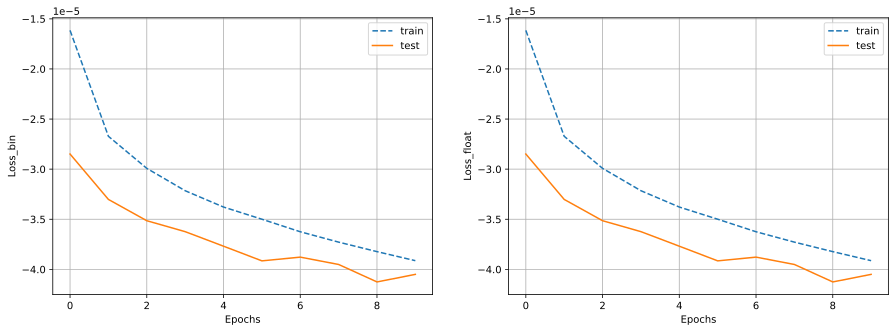

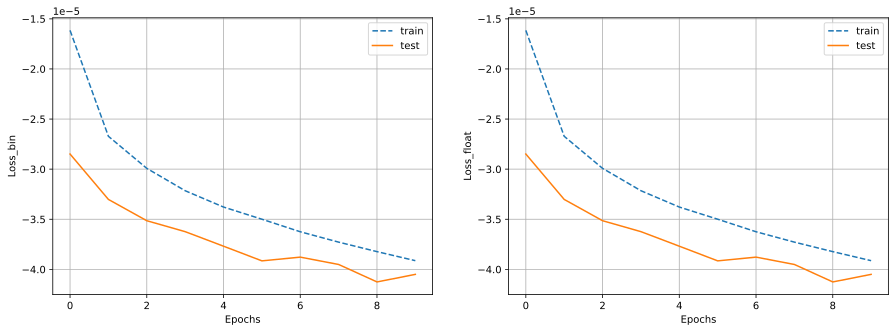

In [ ]:
from TCN import AutoRegressiveTCN

dropout = 0.1
kernel_size = 7
n = 8
hidden_channels = 128
r_seed = 42

input_channels = 3
n_classes = 3 * 5 * 3
channel_sizes = [hidden_channels] * n

device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoRegressiveTCN(input_channels, n_classes, channel_sizes, kernel_size=kernel_size, dropout=dropout).to(device)

lr = 1e-4
epochs = 10

batch_size = 64
train_dataloader = DataLoader(train_check, shuffle=True, batch_size=batch_size)
test_dataloader = DataLoader(test_check, shuffle=False, batch_size=batch_size)

criterion = torch.nn.GaussianNLLLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loaders = {'train': train_dataloader, 'test': test_dataloader}
losses_test, losses_train, TCN_state_prob = train_cycle_TCN(model, epochs, criterion, optimizer, None, loaders, device)

In [ ]:
all = 0
for i in model.named_parameters():
  all += i[1].reshape(-1).shape[0]
  print(i[1].max())

print('Num of params: ', all)

tensor(0.2171, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.7327, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.2752, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0448, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.6185, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.2320, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.2098, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.5633, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0350, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.7130, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.1203, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0393, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.8170, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.1836, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0494, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.8249, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.1205, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0488, device='cuda:0', grad_fn=<MaxBack

In [ ]:
torch.save(TCN_state_prob, 'TCN_SWaT_prob')

In [ ]:
model.load_state_dict(torch.load('/content/TCN_SWaT_prob'))

<All keys matched successfully>

In [ ]:
r = []
g = []
u = []
d = []
x, y = test_check[0]
o = x
x = torch.Tensor(x).to(device)[None, :, :]
model.eval()
for i in range(50):
  _, y = test_check[i]
  result = model(x)
  output = result.reshape(-1, 400, 3, 5, 3)
  output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
  expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
  var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
  #plt.plot(result[0, :, 0].cpu().detach(), label=f'{i}')
  #print(x.shape)
  #print(var.shape)
  varp = var[0, -1, :]
  exp = expect[0, -1, :]
  temp_q_20 = []
  temp_q_80 = []
  for i in range(3):
    expi = exp[i].item()
    vari = varp[i].item()
    print(vari)
    sample = np.random.normal(expi, vari, 200)
    q_20, q_80 = np.quantile(sample, [0.01, 0.99])
    print(q_20 - q_80, i)
    temp_q_20.append(q_20)
    temp_q_80.append(q_80)
  #result = torch.normal(expect, var)
  result = expect
  x = torch.cat((x, result[0, -1, :][None, None, :]), dim=1)
  x = x[:, 1:, :]
  r.append(result[0, -1, :].cpu().detach().numpy())
  g.append(y[-1, :])
  d.append(temp_q_20)
  u.append(temp_q_80)

0.004004524555057287
-0.01671899734648717 0
0.023526646196842194
-0.09624044824070244 1
0.00710767786949873
-0.03047688304813051 2
0.0040151760913431644
-0.020103001061463163 0
0.02363252080976963
-0.12221810893824303 1
0.007113527972251177
-0.03247890431167513 2
0.004030933137983084
-0.017266217143531853 0
0.02375710755586624
-0.10611017247060295 1
0.00712664145976305
-0.03202211551595793 2
0.004050486255437136
-0.01840714199729443 0
0.02390395849943161
-0.10519201321936622 1
0.007144602946937084
-0.030763751529601424 2
0.004068275447934866
-0.018070040553545552 0
0.024060528725385666
-0.09690216168098448 1
0.007156024686992168
-0.03255603871935098 2
0.00408982066437602
-0.01696086646176058 0
0.024223526939749718
-0.10420981420755088 1
0.0071723489090800285
-0.03131188406801361 2
0.0041134958155453205
-0.018648616476866026 0
0.024389198049902916
-0.0988201875935602 1
0.007191217504441738
-0.030744686571238466 2
0.004142259247601032
-0.01968244191745426 0
0.02454383298754692
-0.1102033

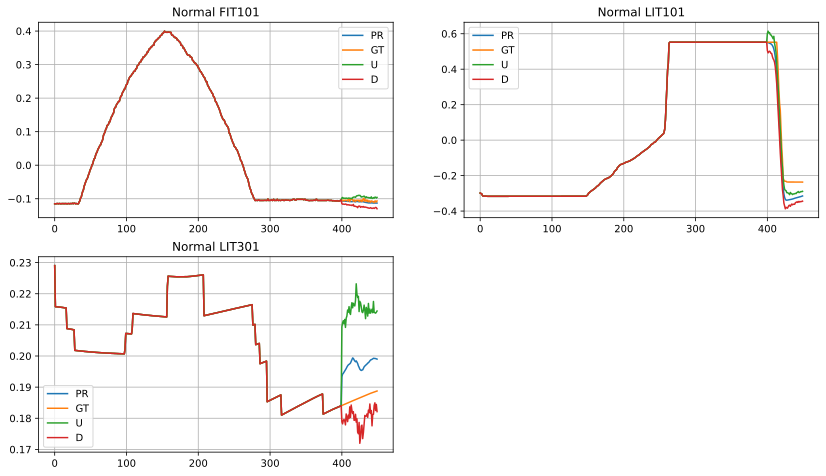

In [ ]:
g = np.array(g)
r = np.array(r)
u = np.array(u)
d = np.array(d)

fig = plt.figure(figsize=(14, 12))
fig.add_subplot(3, 2, 1)
plt.plot([*o[:, 0], *r[:, 0]], label='PR')
plt.plot([*o[:, 0], *g[:, 0]], label='GT')
plt.plot([*o[:, 0], *u[:, 0]], label='U')
plt.plot([*o[:, 0], *d[:, 0]], label='D')
plt.title('Normal FIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 2)
plt.plot([*o[:, 1], *r[:, 1]], label='PR')
plt.plot([*o[:, 1], *g[:, 1]], label='GT')
plt.plot([*o[:, 1], *u[:, 1]], label='U')
plt.plot([*o[:, 1], *d[:, 1]], label='D')
plt.title('Normal LIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 3)
plt.plot([*o[:, 2], *r[:, 2]], label='PR')
plt.plot([*o[:, 2], *g[:, 2]], label='GT')
plt.plot([*o[:, 2], *u[:, 2]], label='U')
plt.plot([*o[:, 2], *d[:, 2]], label='D')
plt.title('Normal LIT301')
plt.legend()
plt.grid()

plt.show()

In [ ]:
class SWaT_Dataset_Autoformer(Dataset):
  def __init__(self, dataset, pred_len=12, seq_len=96, classes=51):
    self.dataset = dataset
    self.len = dataset.shape[0] -  pred_len - seq_len + 1 
    self.pred_len = pred_len
    self.seq_len = seq_len
    self.classes = classes

  def __len__(self):
    return self.len

  def __getitem__(self, idx):
    x, y = self.dataset[idx: idx + self.seq_len], self.dataset[idx + self.seq_len: idx + self.seq_len + self.pred_len]
    return x.reshape(self.seq_len, self.classes), y.reshape(self.pred_len, self.classes)

In [ ]:
train_dataset = SWaT_Dataset_Autoformer(train_data[:, prediction_idx], 10, 100, 3)
test_dataset = SWaT_Dataset_Autoformer(test_data[:, prediction_idx], 10, 100, 3)


In [ ]:
def train_cycle_AF(model, epochs, criterion, optimizer, scheduler, loaders, device, clip=2):
  losses = {'train': [], 'test': []}
  figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
  state = None
  best_loss = 10
  for epoch in range(epochs):
    for mode, dataloader in loaders.items():
      los = []
      total = 0

      for x_batch, y_batch in dataloader:
        if mode == 'train':
          model.train()
          optimizer.zero_grad()
          
          output, _ = model(x_batch.to(device, dtype=torch.float64))

          output = output.reshape(-1, 10, 3, 5, 3)
          output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
          expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
          var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
          normal_dist = torch.distributions.Normal(expect, var)
          neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device).double())
          loss = torch.mean(neg_log_likelihood)
          print(loss.item(), 'Train:', epoch)

          total += y_batch.shape[0] * y_batch.shape[1]
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
          los.append(loss.item())
          optimizer.step()
        else:
          model.eval()
          with torch.no_grad():
            #y_batch = y_batch[:, :, 3]
            output, _ = model(x_batch.to(device, dtype=torch.float64))
            #output: (B, pred_len, 3)
            output = output.reshape(-1, 10, 3, 5, 3)
            output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
            expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
            var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
            normal_dist = torch.distributions.Normal(expect, var)
            neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device).double())
            loss = torch.mean(neg_log_likelihood)
            #loss = criterion(expect, y_batch.to(device).float(), var)
            total += y_batch.shape[0] * y_batch.shape[1]

            print(loss.item(), 'Test:', epoch)

            los.append(loss.item())
      if mode == 'test' and np.sum(los) / (total * 3) < best_loss:
        best_loss = np.sum(los) / (total * 3)
        state = model.state_dict()
        print('BEST EPOCH: ', epoch)
      losses[mode].append(np.sum(los) / (total * 3))

    ax1.set_xlim(0, epoch)
    ax1.cla()
    ax2.set_xlim(0, epoch)
    ax2.cla()
    clear_output(wait=True)
    ax1.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax1.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax2.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax2.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax1.set_xlabel('Epochs')
    ax2.set_xlabel('Epochs')
    ax1.set_ylabel('Loss_bin')
    ax2.set_ylabel('Loss_float')
    ax1.grid(True)
    ax2.grid(True)
    ax1.legend()
    ax2.legend()
    display(figure)
    if scheduler is not None:
      scheduler.step()
  return np.array(losses['test']), np.array(losses['train']), state

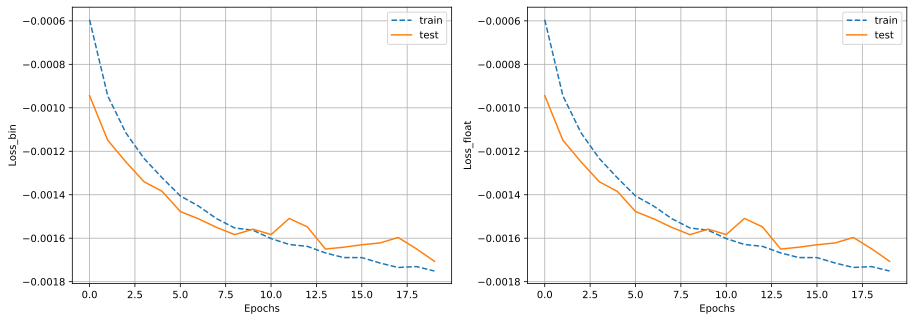

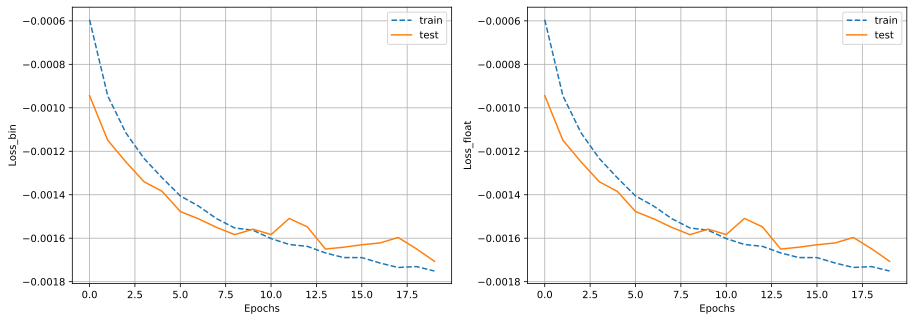

In [ ]:
from AutoFormer import AutoFormerSWaT, AutoFormer

device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoFormerSWaT(seq_len=100, label_len=100, pred_len=10, input_dim=3, d_model=256, classes=3 * 5 * 3)
model.to(device)

batch_size = 64
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

lr = 1e-4
epochs = 20

criterion = torch.nn.GaussianNLLLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loaders = {'train': train_dataloader, 'test': test_dataloader}
losses_test, losses_train, Transformer_state_prob = train_cycle_AF(model, epochs, criterion, optimizer, None, loaders, device)

In [ ]:
all = 0
for i in model.named_parameters():
  print(i[1].max())
  all += i[1].reshape(-1).shape[0]

print(all)

tensor(1.8460, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.3338, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(3.5525, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(3.8234, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(3.9654, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(3.5712, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(4.3784, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0963, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0618, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.1243, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0613, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.1095, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0626, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0750, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0368, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0962, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0565, device='cuda:0', grad_fn=<MaxBackward1>)
tensor(0.0549, device='cuda:0', grad_fn=<MaxBack

In [ ]:
torch.save(Transformer_state_prob, 'AF_SWaT_prob')
model.load_state_dict(torch.load('/content/AF_SWaT_prob'))

<All keys matched successfully>

In [ ]:
r = []
g = []
u = []
d = []
x, y = test_dataset[0]
o = x
x = torch.Tensor(x).to(device)[None, :, :].double()
model.eval()
for k in range(1):
  _, y = test_dataset[k*10]
  result, _ = model(x)
  output = result.reshape(-1, 10, 3, 5, 3)
  output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
  expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
  var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
  #plt.plot(result[0, :, 0].cpu().detach(), label=f'{i}')
  #print(x.shape)
  #print(var.shape)
  temp_q_20 = []
  temp_q_80 = []
  for b in range(10):
    varp = var[0, -1, :]
    exp = expect[0, -1, :]
    temp_q_20_t = []
    temp_q_80_t = []
    for i in range(3):
      expi = exp[i].item()
      vari = varp[i].item()
      print(vari)
      sample = np.random.normal(expi, vari, 200)
      q_20, q_80 = np.quantile(sample, [0.01, 0.99])
      print(q_20 - q_80, i)
      temp_q_20_t.append(q_20)
      temp_q_80_t.append(q_80)
    
    temp_q_20.append(temp_q_20_t)
    temp_q_80.append(temp_q_80_t)
  #result = torch.normal(expect, var)
  result = expect
  d.append(temp_q_20)
  u.append(temp_q_80)
  x = torch.cat((x, result), dim=1)
  x = x[:, 10:, :]
  r.append(result.cpu().detach().numpy())
  g.append(y)

0.010261099855421372
-0.0468325165060198 0
0.023099799528953392
-0.11319072826069576 1
0.008542458776653186
-0.034396785066853064 2
0.010261099855421372
-0.04583488452767749 0
0.023099799528953392
-0.11230763383018416 1
0.008542458776653186
-0.033533145463162106 2
0.010261099855421372
-0.04013951837854725 0
0.023099799528953392
-0.09426269645544239 1
0.008542458776653186
-0.03496892803247617 2
0.010261099855421372
-0.04785986532907403 0
0.023099799528953392
-0.11736543641032748 1
0.008542458776653186
-0.03837741191927879 2
0.010261099855421372
-0.04609140470662146 0
0.023099799528953392
-0.10643644728204249 1
0.008542458776653186
-0.0397206215988668 2
0.010261099855421372
-0.04482690856093652 0
0.023099799528953392
-0.09387607037212864 1
0.008542458776653186
-0.03880234975210309 2
0.010261099855421372
-0.05059914086510314 0
0.023099799528953392
-0.08906220815215016 1
0.008542458776653186
-0.038369709383814926 2
0.010261099855421372
-0.04506991418989556 0
0.023099799528953392
-0.1085664

In [ ]:
g = np.array(g)
r = np.array(r)
u = np.array(u)
d = np.array(d)

In [ ]:
o = np.array(o)

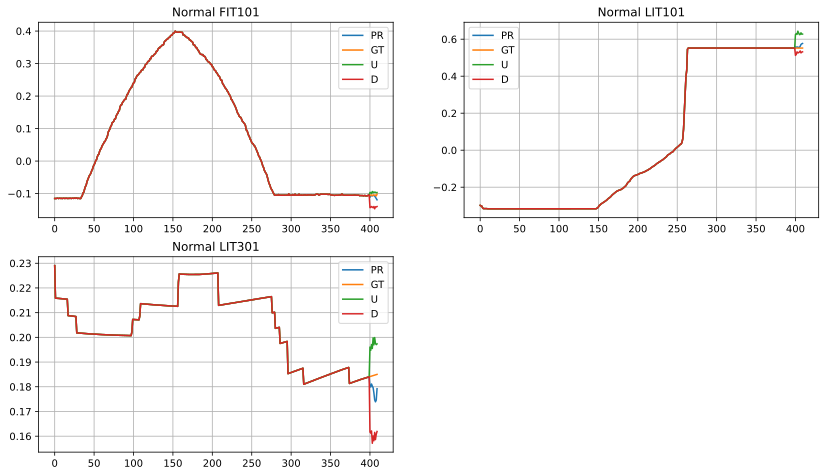

In [ ]:
g = np.array(g)
r = np.array(r)
u = np.array(u)
d = np.array(d)

r = r.reshape(10, 3)
g = g.reshape(10, 3)
u = u.reshape(10, 3)
d = d.reshape(10, 3)

fig = plt.figure(figsize=(14, 12))
fig.add_subplot(3, 2, 1)
plt.plot([*o[:, 0], *r[:, 0]], label='PR')
plt.plot([*o[:, 0], *g[:, 0]], label='GT')
plt.plot([*o[:, 0], *u[:, 0]], label='U')
plt.plot([*o[:, 0], *d[:, 0]], label='D')
plt.title('Normal FIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 2)
plt.plot([*o[:, 1], *r[:, 1]], label='PR')
plt.plot([*o[:, 1], *g[:, 1]], label='GT')
plt.plot([*o[:, 1], *u[:, 1]], label='U')
plt.plot([*o[:, 1], *d[:, 1]], label='D')
plt.title('Normal LIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 3)
plt.plot([*o[:, 2], *r[:, 2]], label='PR')
plt.plot([*o[:, 2], *g[:, 2]], label='GT')
plt.plot([*o[:, 2], *u[:, 2]], label='U')
plt.plot([*o[:, 2], *d[:, 2]], label='D')
plt.title('Normal LIT301')
plt.legend()
plt.grid()

plt.show()

In [ ]:
r = []
g = []
u = []
d = []
x, y = test_dataset[0]
o = x
x = torch.Tensor(x).to(device)[None, :, :].double()
for i in range(len(test_check) // 10):
  if i % 2 == 0:
    x, _ = test_dataset[i*10]
    x = torch.Tensor(x).to(device)[None, :, :].double()
  _, y = test_dataset[i*10]
  result, _ = model(x)
  output = result.reshape(-1, 10, 3, 5, 3)
  output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
  expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
  var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
  #plt.plot(result[0, :, 0].cpu().detach(), label=f'{i}')
  #print(x.shape)
  #print(var.shape)
  varp = var[0, -1, :]
  exp = expect[0, -1, :]
  temp_q_20 = []
  temp_q_80 = []
  for b in range(10):
    varp = var[0, -1, :]
    exp = expect[0, -1, :]
    temp_q_20_t = []
    temp_q_80_t = []
    for j in range(3):
      expi = exp[j].item()
      vari = varp[j].item()
      print(vari)
      sample = np.random.normal(expi, vari, 200)
      q_20, q_80 = np.quantile(sample, [0.01, 0.99])
      print(q_20 - q_80, j)
      temp_q_20_t.append(q_20)
      temp_q_80_t.append(q_80)
    
    temp_q_20.append(temp_q_20_t)
    temp_q_80.append(temp_q_80_t)
  #result = torch.normal(expect, var)
  result = expect
  #if result[0, -1, -1] > 0:
  #  result[0, -1, -1] = 0
  #else:
  #  result[0, -1, -1] = 0
  x = torch.cat((x, result), dim=1)
  x = x[:, 10:, :]
  r.append(result.cpu().detach().numpy())
  g.append(y)
  d.append(temp_q_20)
  u.append(temp_q_80)

Выходные данные были обрезаны до нескольких последних строк (5000).
0.008106569960840127
-0.037174187258044805 2
0.011266825554409911
-0.04906531381427946 0
0.010640752451862705
-0.05257014371956059 1
0.008106569960840127
-0.03441540662690536 2
0.011266825554409911
-0.051907787614567415 0
0.010640752451862705
-0.04930747095233007 1
0.008106569960840127
-0.03566218455502736 2
0.011266825554409911
-0.05135751517987804 0
0.010640752451862705
-0.045802039806198125 1
0.008106569960840127
-0.0375932641230133 2
0.011562582472814381
-0.056578588773549904 0
0.010742251153914235
-0.048059721099659725 1
0.00813297255523342
-0.03720285477110402 2
0.011562582472814381
-0.047126432006578164 0
0.010742251153914235
-0.050202372322140365 1
0.00813297255523342
-0.03589602040020046 2
0.011562582472814381
-0.05307840691658527 0
0.010742251153914235
-0.05198600134258591 1
0.00813297255523342
-0.03724916583010199 2
0.011562582472814381
-0.05217224417094684 0
0.010742251153914235
-0.04522048747469626 1
0.008

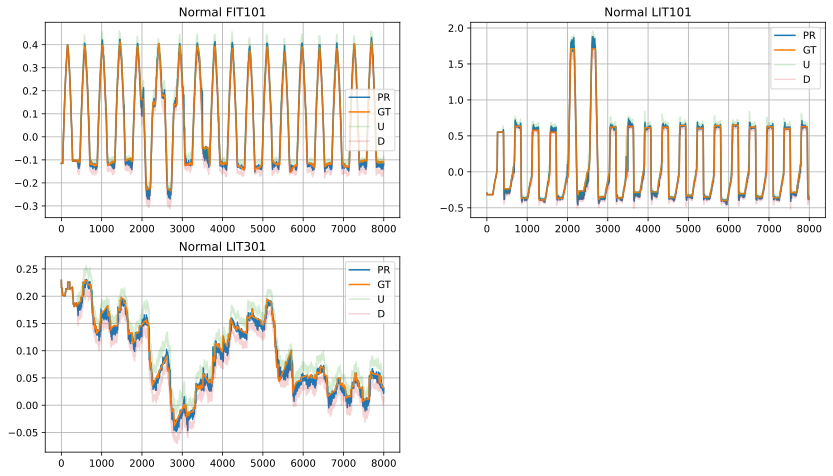

In [ ]:
g = np.array(g).reshape(-1, 3)
r = np.array(r).reshape(-1, 3)
u = np.array(u).reshape(-1, 3)
d = np.array(d).reshape(-1, 3)

fig = plt.figure(figsize=(14, 12))
fig.add_subplot(3, 2, 1)
plt.plot([*o[:, 0], *r[:, 0]], label='PR')
plt.plot([*o[:, 0], *g[:, 0]], label='GT')
plt.plot([*o[:, 0], *u[:, 0]], label='U', alpha=0.2)
plt.plot([*o[:, 0], *d[:, 0]], label='D', alpha=0.2)
plt.title('Normal FIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 2)
plt.plot([*o[:, 1], *r[:, 1]], label='PR')
plt.plot([*o[:, 1], *g[:, 1]], label='GT')
plt.plot([*o[:, 1], *u[:, 1]], label='U', alpha=0.2)
plt.plot([*o[:, 1], *d[:, 1]], label='D', alpha=0.2)
plt.title('Normal LIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 3)
plt.plot([*o[:, 2], *r[:, 2]], label='PR')
plt.plot([*o[:, 2], *g[:, 2]], label='GT')
plt.plot([*o[:, 2], *u[:, 2]], label='U', alpha=0.2)
plt.plot([*o[:, 2], *d[:, 2]], label='D', alpha=0.2)
plt.title('Normal LIT301')
plt.legend()
plt.grid()

plt.show()

In [ ]:
def train_cycle_EncDec(model, epochs, criterion, optimizer, scheduler, loaders, device, clip=2):
  losses = {'train': [], 'test': []}
  figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
  state = None
  best_loss = 10
  for epoch in range(epochs):
    for mode, dataloader in loaders.items():
      los = []
      total = 0

      for x_batch, y_batch in dataloader:
        if mode == 'train':
          model.train()
          optimizer.zero_grad()
          # y_batch: (B, pred_len, 3)
          # x_batch: (B, seq_len, 3)

          x = x_batch[:, :400, :]
          target = x_batch[:, 400:, :]
          y_batch = y_batch[:, -20:, :]
          #print(x.shape, target.shape)

          output, _ = model(x.to(device).float(), target.to(device).float())
          #output: (B, pred_len, classes)
          output = output.reshape(-1, 20, 3, 5, 3)
          output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
          expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
          var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
          normal_dist = torch.distributions.Normal(expect, var)
          neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device).float())
          loss = torch.mean(neg_log_likelihood)
          print(loss.item(), 'Train:', epoch)

          total += y_batch.shape[0] * y_batch.shape[1]
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
          los.append(loss.item())
          optimizer.step()
        else:
          model.eval()
          with torch.no_grad():
            #y_batch = y_batch[:, :, 3]
            x = x_batch[:, :400, :]
            target = x_batch[:, 400:, :]
            y_batch = y_batch[:, -20:, :]

            output, _ = model(x.to(device).float(), target.to(device).float())
            #output: (B, pred_len, classes)
            output = output.reshape(-1, 20, 3, 5, 3)
            output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
            expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
            var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
            normal_dist = torch.distributions.Normal(expect, var)
            neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device).float())
            loss = torch.mean(neg_log_likelihood)
            #loss = criterion(expect, y_batch.to(device).float(), var)
            total += y_batch.shape[0] * y_batch.shape[1]

            print(loss.item(), 'Test:', epoch)

            los.append(loss.item())
      if mode == 'test' and np.sum(los) / (total * 3) < best_loss:
        best_loss = np.sum(los) / (total * 3)
        state = model.state_dict()
        print('BEST EPOCH: ', epoch)
      losses[mode].append(np.sum(los) / (total * 3))

    ax1.set_xlim(0, epoch)
    ax1.cla()
    ax2.set_xlim(0, epoch)
    ax2.cla()
    clear_output(wait=True)
    ax1.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax1.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax2.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax2.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax1.set_xlabel('Epochs')
    ax2.set_xlabel('Epochs')
    ax1.set_ylabel('Loss_bin')
    ax2.set_ylabel('Loss_float')
    ax1.grid(True)
    ax2.grid(True)
    ax1.legend()
    ax2.legend()
    display(figure)
    if scheduler is not None:
      scheduler.step()
  return np.array(losses['test']), np.array(losses['train']), state

In [ ]:
train_check = SWaT_Dataset_Autoformer_TCN(train_data[:, prediction_idx], 420, 3)
test_check = SWaT_Dataset_Autoformer_TCN(test_data[:, prediction_idx], 420, 3)

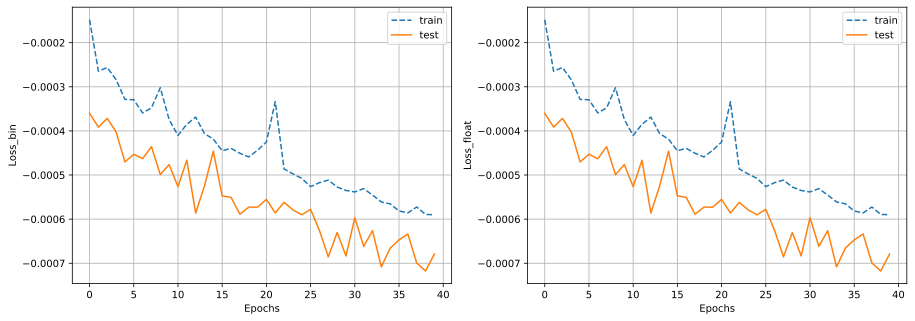

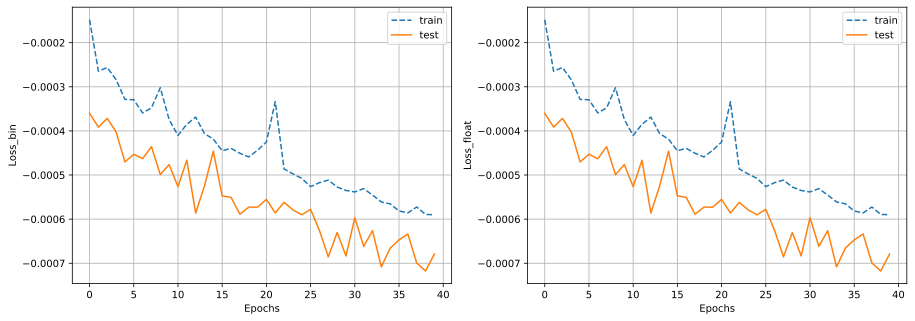

In [ ]:
from TCN import TCN_EncDecAttn

dropout = 0.1
kernel_size = 7
n = 8
hidden_channels = 128
r_seed = 42

input_channels = 3
n_classes = 3 * 5 * 3
channel_sizes = [hidden_channels] * n

device = "cuda" if torch.cuda.is_available() else "cpu"
model = TCN_EncDecAttn(n_classes, input_channels, channel_sizes, kernel_size=kernel_size, dropout=dropout, num_heads=32, device=device).to(device)

lr = 1e-4
epochs = 40

batch_size = 64
train_dataloader = DataLoader(train_check, shuffle=True, batch_size=batch_size)
test_dataloader = DataLoader(test_check, shuffle=False, batch_size=batch_size)

criterion = torch.nn.GaussianNLLLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loaders = {'train': train_dataloader, 'test': test_dataloader}
losses_test, losses_train, EncDec_state_prob = train_cycle_EncDec(model, epochs, criterion, optimizer, None, loaders, device)

In [ ]:
torch.save(EncDec_state_prob, 'EncDec_SWaT_prob')
model.load_state_dict(torch.load('/content/EncDec_SWaT_prob'))

<All keys matched successfully>

In [ ]:
from TimesNet import Model

In [ ]:
def train_cycle_TN(model, epochs, criterion, optimizer, scheduler, loaders, device, clip=2):
  losses = {'train': [], 'test': []}
  figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
  state = None
  best_loss = 10
  best_epoch = 0
  for epoch in range(epochs):
    for mode, dataloader in loaders.items():
      los = []
      total = 0

      for x_batch, y_batch in dataloader:
        if mode == 'train':
          model.train()
          optimizer.zero_grad()
          
          output = model(x_batch.to(device).float())

          output = output.reshape(-1, 10, 3, 5, 3)
          output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
          expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
          var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
          normal_dist = torch.distributions.Normal(expect, var)
          neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device))
          loss = torch.mean(neg_log_likelihood)
          print(loss.item(), 'Train:', epoch)

          total += y_batch.shape[0] * y_batch.shape[1]
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
          los.append(loss.item())
          optimizer.step()
        else:
          model.eval()
          with torch.no_grad():
            #y_batch = y_batch[:, :, 3]
            output = model(x_batch.to(device).float())
            #output: (B, pred_len, 3)
            output = output.reshape(-1, 10, 3, 5, 3)
            output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
            expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
            var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
            normal_dist = torch.distributions.Normal(expect, var)
            neg_log_likelihood = -normal_dist.log_prob(y_batch.to(device))
            loss = torch.mean(neg_log_likelihood)
            #loss = criterion(expect, y_batch.to(device).float(), var)
            total += y_batch.shape[0] * y_batch.shape[1]

            print(loss.item(), 'Test:', epoch, best_epoch)

            los.append(loss.item())
      if mode == 'test' and np.sum(los) / (total * 3) < best_loss:
        best_loss = np.sum(los) / (total * 3)
        state = model.state_dict()
        best_epoch = epoch
        print('BEST EPOCH: ', epoch)
      losses[mode].append(np.sum(los) / (total * 3))

    ax1.set_xlim(0, epoch)
    ax1.cla()
    ax2.set_xlim(0, epoch)
    ax2.cla()
    clear_output(wait=True)
    ax1.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax1.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax2.plot(range(epoch + 1), losses['train'], label='train', linestyle='dashed')
    ax2.plot(range(epoch + 1), losses['test'], label='test', linestyle='solid')
    ax1.set_xlabel('Epochs')
    ax2.set_xlabel('Epochs')
    ax1.set_ylabel('Loss_bin')
    ax2.set_ylabel('Loss_float')
    ax1.grid(True)
    ax2.grid(True)
    ax1.legend()
    ax2.legend()
    display(figure)
    if scheduler is not None:
      scheduler.step()
  return np.array(losses['test']), np.array(losses['train']), state

In [ ]:
train_dataset = SWaT_Dataset_Autoformer(train_data[:, prediction_idx], 10, 400, 3)
test_dataset = SWaT_Dataset_Autoformer(test_data[:, prediction_idx], 10, 400, 3)

In [ ]:
class TN_prob(nn.Module):
  def __init__(self, seq_len, label_len, pred_len, input_dim, c_out, d_model):
    super(TN_prob, self).__init__()

    self.TN = Model(seq_len, label_len, pred_len, input_dim, d_model, d_model=d_model)
    self.fc = nn.Linear(d_model, c_out)
  
  def forward(self, x):
    output = self.TN(x)
    output = self.fc(output)

    return output

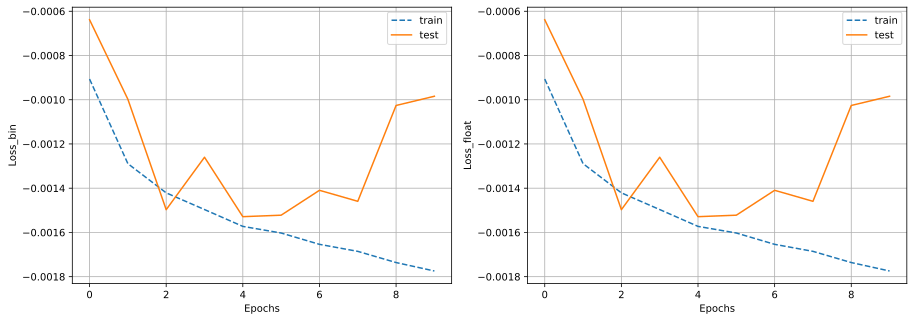

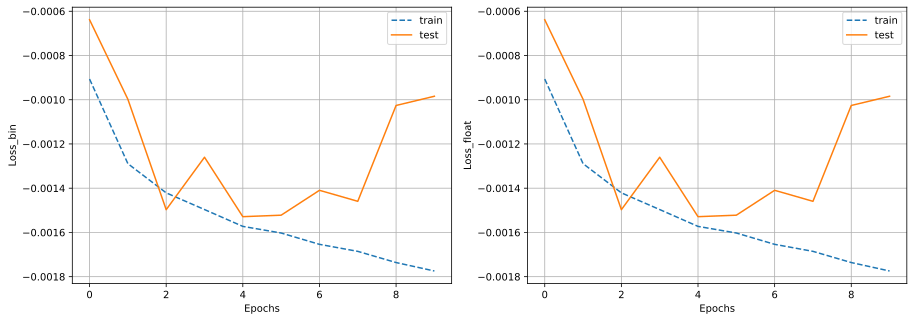

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = TN_prob(400, 400, 10, 3, 45, d_model=64).to(device).float()

batch_size = 32
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

lr = 1e-4
epochs = 10

criterion = torch.nn.GaussianNLLLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loaders = {'train': train_dataloader, 'test': test_dataloader}
losses_test, losses_train, TN_state_prob = train_cycle_TN(model, epochs, criterion, optimizer, None, loaders, device)

In [ ]:
all = 0
for i in model.named_parameters():
  print(i[1].reshape(-1).shape[0], i[1].shape, i[0])
  all += i[1].reshape(-1).shape[0]

print(all)

2048 torch.Size([32, 64, 1, 1]) TN.model.0.conv.0.kernels.0.weight
32 torch.Size([32]) TN.model.0.conv.0.kernels.0.bias
18432 torch.Size([32, 64, 3, 3]) TN.model.0.conv.0.kernels.1.weight
32 torch.Size([32]) TN.model.0.conv.0.kernels.1.bias
51200 torch.Size([32, 64, 5, 5]) TN.model.0.conv.0.kernels.2.weight
32 torch.Size([32]) TN.model.0.conv.0.kernels.2.bias
100352 torch.Size([32, 64, 7, 7]) TN.model.0.conv.0.kernels.3.weight
32 torch.Size([32]) TN.model.0.conv.0.kernels.3.bias
165888 torch.Size([32, 64, 9, 9]) TN.model.0.conv.0.kernels.4.weight
32 torch.Size([32]) TN.model.0.conv.0.kernels.4.bias
247808 torch.Size([32, 64, 11, 11]) TN.model.0.conv.0.kernels.5.weight
32 torch.Size([32]) TN.model.0.conv.0.kernels.5.bias
2048 torch.Size([64, 32, 1, 1]) TN.model.0.conv.2.kernels.0.weight
64 torch.Size([64]) TN.model.0.conv.2.kernels.0.bias
18432 torch.Size([64, 32, 3, 3]) TN.model.0.conv.2.kernels.1.weight
64 torch.Size([64]) TN.model.0.conv.2.kernels.1.bias
51200 torch.Size([64, 32, 5, 

In [ ]:
torch.save(TN_state_prob, 'TN_SWaT_prob')
model.load_state_dict(torch.load('/content/TN_SWaT_prob'))

<All keys matched successfully>

In [ ]:
r = []
g = []
u = []
d = []
x, y = test_dataset[0]
o = x
x = torch.Tensor(x).to(device)[None, :, :].double()
model.eval()
model.to(device)
for k in range(1):
  _, y = test_dataset[k*10]
  result = model(x.to(device).float())
  output = result.reshape(-1, 10, 3, 5, 3)
  output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
  expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
  var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
  #plt.plot(result[0, :, 0].cpu().detach(), label=f'{i}')
  #print(x.shape)
  #print(var.shape)
  temp_q_20 = []
  temp_q_80 = []
  for b in range(10):
    varp = var[0, -1, :]
    exp = expect[0, -1, :]
    temp_q_20_t = []
    temp_q_80_t = []
    for i in range(3):
      expi = exp[i].item()
      vari = varp[i].item()
      print(vari)
      sample = np.random.normal(expi, vari, 200)
      q_20, q_80 = np.quantile(sample, [0.2, 0.8])
      print(q_20 - q_80, i)
      temp_q_20_t.append(q_20)
      temp_q_80_t.append(q_80)
    
    temp_q_20.append(temp_q_20_t)
    temp_q_80.append(temp_q_80_t)
  #result = torch.normal(expect, var)
  result = expect
  d.append(temp_q_20)
  u.append(temp_q_80)
  x = torch.cat((x, result), dim=1)
  x = x[:, 10:, :]
  r.append(result.cpu().detach().numpy())
  g.append(y)

0.01050026435405016
-0.01989750070992896 0
0.04986706003546715
-0.08005089004862564 1
0.11008159816265106
-0.18714452752983557 2
0.01050026435405016
-0.017683143654218275 0
0.04986706003546715
-0.08891815450770191 1
0.11008159816265106
-0.1951585386967173 2
0.01050026435405016
-0.016533954423896158 0
0.04986706003546715
-0.09547656693818896 1
0.11008159816265106
-0.1735638277050549 2
0.01050026435405016
-0.01754639399269213 0
0.04986706003546715
-0.08595911858326744 1
0.11008159816265106
-0.1873973439589205 2
0.01050026435405016
-0.017797273292284976 0
0.04986706003546715
-0.08680498669366532 1
0.11008159816265106
-0.18971442426950652 2
0.01050026435405016
-0.019507130843714818 0
0.04986706003546715
-0.09372999897260115 1
0.11008159816265106
-0.16894922865108541 2
0.01050026435405016
-0.01702199510703163 0
0.04986706003546715
-0.08197703120827227 1
0.11008159816265106
-0.18847773682978974 2
0.01050026435405016
-0.016682855392559995 0
0.04986706003546715
-0.0909674414611975 1
0.11008159

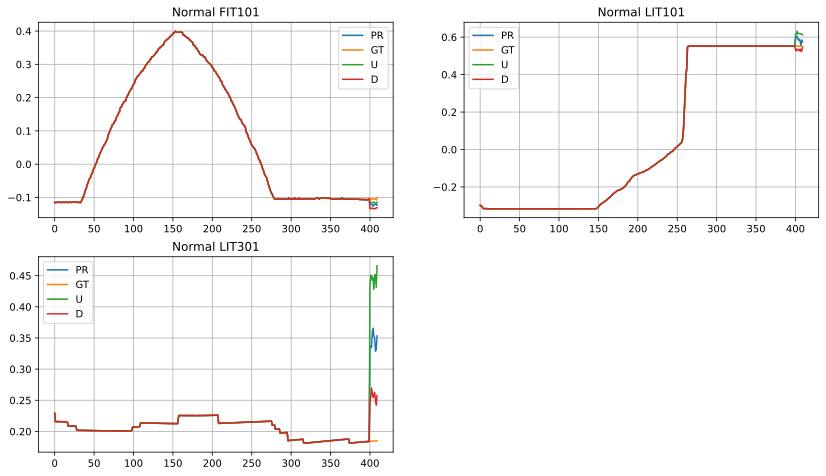

In [ ]:
g = np.array(g)
r = np.array(r)
u = np.array(u)
d = np.array(d)

r = r.reshape(10, 3)
g = g.reshape(10, 3)
u = u.reshape(10, 3)
d = d.reshape(10, 3)

fig = plt.figure(figsize=(14, 12))
fig.add_subplot(3, 2, 1)
plt.plot([*o[:, 0], *r[:, 0]], label='PR')
plt.plot([*o[:, 0], *g[:, 0]], label='GT')
plt.plot([*o[:, 0], *u[:, 0]], label='U')
plt.plot([*o[:, 0], *d[:, 0]], label='D')
plt.title('Normal FIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 2)
plt.plot([*o[:, 1], *r[:, 1]], label='PR')
plt.plot([*o[:, 1], *g[:, 1]], label='GT')
plt.plot([*o[:, 1], *u[:, 1]], label='U')
plt.plot([*o[:, 1], *d[:, 1]], label='D')
plt.title('Normal LIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 3)
plt.plot([*o[:, 2], *r[:, 2]], label='PR')
plt.plot([*o[:, 2], *g[:, 2]], label='GT')
plt.plot([*o[:, 2], *u[:, 2]], label='U')
plt.plot([*o[:, 2], *d[:, 2]], label='D')
plt.title('Normal LIT301')
plt.legend()
plt.grid()

plt.show()

In [ ]:
r = []
g = []
u = []
d = []
x, y = test_dataset[0]
o = x
x = torch.Tensor(x).to(device)[None, :, :].double()
for i in range(len(test_check) // 10):
  if i % 2 == 0:
    x, _ = test_dataset[i*10]
    x = torch.Tensor(x).to(device)[None, :, :].double()
  _, y = test_dataset[i*10]
  result = model(x.float())
  output = result.reshape(-1, 10, 3, 5, 3)
  output[:, :, :, :, -1] = torch.nn.Softmax(dim=-1)(output[:, :, :, :, -1])
  expect = (output[:, :, :, :, 0] * output[:, :, :, :, -1]).sum(dim=-1)
  var = ((torch.nn.ELU()(output[:, :, :, :, 1]) + 1) * output[:, :, :, :, -1]).sum(dim=-1)
  #plt.plot(result[0, :, 0].cpu().detach(), label=f'{i}')
  #print(x.shape)
  #print(var.shape)
  varp = var[0, -1, :]
  exp = expect[0, -1, :]
  temp_q_20 = []
  temp_q_80 = []
  for b in range(10):
    varp = var[0, -1, :]
    exp = expect[0, -1, :]
    temp_q_20_t = []
    temp_q_80_t = []
    for j in range(3):
      expi = exp[j].item()
      vari = varp[j].item()
      print(vari)
      sample = np.random.normal(expi, vari, 200)
      q_20, q_80 = np.quantile(sample, [0.01, 0.99])
      print(q_20 - q_80, j)
      temp_q_20_t.append(q_20)
      temp_q_80_t.append(q_80)
    
    temp_q_20.append(temp_q_20_t)
    temp_q_80.append(temp_q_80_t)
  #result = torch.normal(expect, var)
  result = expect
  #if result[0, -1, -1] > 0:
  #  result[0, -1, -1] = 0
  #else:
  #  result[0, -1, -1] = 0
  x = torch.cat((x, result), dim=1)
  x = x[:, 10:, :]
  r.append(result.cpu().detach().numpy())
  g.append(y)
  d.append(temp_q_20)
  u.append(temp_q_80)

Выходные данные были обрезаны до нескольких последних строк (5000).
0.14450356364250183
-0.7050600720436961 2
0.010709193535149097
-0.045398197594299666 0
0.03967788815498352
-0.1547032486447686 1
0.14450356364250183
-0.6461016859982153 2
0.010709193535149097
-0.04786198049986093 0
0.03967788815498352
-0.18722481607030644 1
0.14450356364250183
-0.6431643190960183 2
0.010709193535149097
-0.05216377174557975 0
0.03967788815498352
-0.1708047950674012 1
0.14450356364250183
-0.6759698128489922 2
0.011291885748505592
-0.047259512799898575 0
0.04163273423910141
-0.17610591200250403 1
0.20240840315818787
-0.9259550802220677 2
0.011291885748505592
-0.04657745251183052 0
0.04163273423910141
-0.166056039232643 1
0.20240840315818787
-0.8080291846715759 2
0.011291885748505592
-0.0504301021337418 0
0.04163273423910141
-0.1876881155506011 1
0.20240840315818787
-0.8447528872259579 2
0.011291885748505592
-0.05417063814858271 0
0.04163273423910141
-0.16722391890197025 1
0.20240840315818787
-0.8559182920

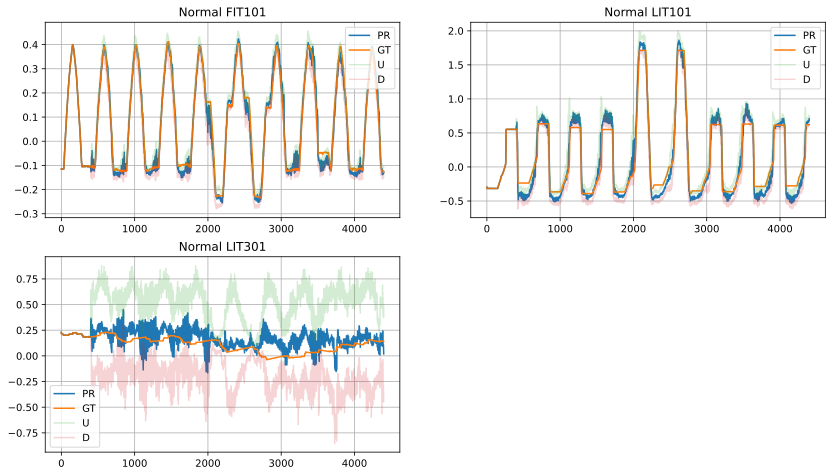

In [ ]:
g = np.array(g).reshape(-1, 3)
r = np.array(r).reshape(-1, 3)
u = np.array(u).reshape(-1, 3)
d = np.array(d).reshape(-1, 3)

fig = plt.figure(figsize=(14, 12))
fig.add_subplot(3, 2, 1)
plt.plot([*o[:, 0], *r[: 4000, 0]], label='PR')
plt.plot([*o[:, 0], *g[:4000, 0]], label='GT')
plt.plot([*o[:, 0], *u[:4000, 0]], label='U', alpha=0.2)
plt.plot([*o[:, 0], *d[:4000, 0]], label='D', alpha=0.2)
plt.title('Normal FIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 2)
plt.plot([*o[:, 1], *r[:4000, 1]], label='PR')
plt.plot([*o[:, 1], *g[:4000, 1]], label='GT')
plt.plot([*o[:, 1], *u[:4000, 1]], label='U', alpha=0.2)
plt.plot([*o[:, 1], *d[:4000, 1]], label='D', alpha=0.2)
plt.title('Normal LIT101')
plt.legend()
plt.grid()

fig.add_subplot(3, 2, 3)
plt.plot([*o[:, 2], *r[:4000, 2]], label='PR')
plt.plot([*o[:, 2], *g[:4000, 2]], label='GT')
plt.plot([*o[:, 2], *u[:4000, 2]], label='U', alpha=0.2)
plt.plot([*o[:, 2], *d[:4000, 2]], label='D', alpha=0.2)
plt.title('Normal LIT301')
plt.legend()
plt.grid()

plt.show()